Let's redesign the schedule for the Sofia 72 bus!

# Step 1) Load the data

In [1]:
with open('/data/sofiatraffic/72.html') as inp: data = inp.read()

Since there is no available API, we'll have to parse the raw HTML.


In [2]:
from bs4 import BeautifulSoup

In [3]:
html_data = BeautifulSoup(data)

In [141]:
schedules = html_data.findAll("div", attrs={"class":"schedule_view_direction"})

In [239]:
stops = html_data.findAll("ul", attrs={"class": "schedule_direction_signs"})

In [245]:
stop_names = [s.text for s in stops[0].findAll("a", attrs={"class": "stop_change"})]

In [246]:
stop_names

['ХОТЕЛ ПЛИСКА',
 'ШИПЧЕНСКИ ПРОХОД',
 'УЛ. ГЕО МИЛЕВ',
 'ЗАЛА ФЕСТИВАЛНА',
 'УЛ. КАЛИМАНЦИ',
 'УЛ. АТАНАС УЗУНОВ',
 'ЧИТАЛИЩЕ ОТЕЦ ПАИСИЙ',
 'УЛ. ВЕЛЧО АТАНАСОВ',
 'ГАРА ПОДУЯНЕ',
 'УЛ. ОБОРИЩЕ',
 'УЛ. ЧЕРКОВНА',
 '129-ТО ОУ',
 'ВОЕННА АКАДЕМИЯ',
 'ПЛ. ОРЛОВ МОСТ',
 'УЛ. ГРАФ ИГНАТИЕВ',
 'УЛ. 6-ТИ СЕПТЕМВРИ',
 'БУЛ. ЧЕРНИ ВРЪХ',
 'БУЛ. ВИТОША',
 'УМБАЛ СВ. ЕКАТЕРИНА',
 'УМБАЛ АЛЕКСАНДРОВСКА',
 'ВМА',
 'БУЛ. ЦАР БОРИС ІІІ',
 'УЛ. ГЮЕШЕВО',
 'БУЛ. ВЪЗКРЕСЕНИЕ',
 'БУЛ. ВАРДАР',
 'УЛ. ПРОФ. ВАЙГАНД',
 'Ж.К. КРАСНА ПОЛЯНА',
 'Ж.К. ЗАПАДЕН ПАРК']

In [237]:
len(schedules)

4

In [143]:
schedule1 = schedules[0].findAll("div", attrs={"class": "hours_cell"})

In [146]:
s = schedule1[1].find('a').get('onclick')

In [147]:
from ast import literal_eval as make_tuple
def parseOnClick(s):
    s = s.replace("Raz.exec ('show_course', ", "").replace("); return false;", "")
    return [int(x) for x in make_tuple(s)[1].split(",")[1:]]


display(s)
display(parseOnClick(s))

"Raz.exec ('show_course', ['7f269402b', '1,300,302,303,304,305,306,307,309,311,312,314,315,317,320,323,324,326,328,329,331,333,335,337,339,341,343,344,346']); return false;"

[300,
 302,
 303,
 304,
 305,
 306,
 307,
 309,
 311,
 312,
 314,
 315,
 317,
 320,
 323,
 324,
 326,
 328,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 344,
 346]

In [148]:
timeseries = []
for column in schedule1:
    if column.find('a'):
        for row in column.findAll('a'):
            timeseries.append(parseOnClick(row.get('onclick')))

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('white')
%matplotlib inline


In [288]:
lines[0][0].set_markerfacecolor

<bound method Line2D.set_markerfacecolor of <matplotlib.lines.Line2D object at 0x7fb881731a90>>

In [ ]:
lines[0][0].set_markerfacecolor

In [354]:

def plot_it(add_time=False, add_stop=False, num_series=None, xlim=None, figsize=(40,20), fn="72map"):
    if num_series is None:
        num_series = len(timeseries)
    fig, ax = plt.subplots(figsize=figsize)
    sns.despine(fig,left=True, bottom=True)
    stops = [i for i in range(len(timeseries[0]))]
    lines = [ax.plot(ts, stops, 'bo-', lw=3, zorder=1, color='#2c54a4') for ts in timeseries[:num_series]]

    grid = list(range(300, 1500,60))
    half_grid = list(range(300, 1500, 15))
    half_grid = [x for x in half_grid if x % 60 != 0]
    ax.vlines(grid,0, len(timeseries[0])-1, color='#909090', lw=1.2, linestyles='--')
    ax.vlines(half_grid,0, len(timeseries[0])-1, color='#909090', lw=0.5, linestyles='--')

    ax.set_xticks(grid)
    ax.set_xticks(half_grid, minor=True)

    ax.set_xticklabels([f"{x//60}:00" for x in grid],size=14,rotation=90)
    ax.set_ylim(-0.25,len(timeseries[0]))
    ax.set_xticklabels([f"{x//60}:{x%60}" for x in half_grid],size=10,rotation=90, minor=True)

    ax.set_yticks(list(range(len(timeseries[0]))))
    ylabels = ax.set_yticklabels(stop_names, size=12)

    if xlim is None:
        ax.set_xlim(290, 24*60)
    else:
        ax.set_xlim(xlim)

    highlight_color = "#eb8e15"

    
    if add_time:
    # add current time line
        ax.vlines([747], -0.2, len(timeseries[0])-0.5, color=highlight_color, lw=5, linestyles="-", zorder=2)

    if add_stop:
        #color current stop
        ylabels[5].set_color(highlight_color)
        ylabels[5].set_weight("bold")
        ax.hlines([5],290, 1380, color=highlight_color,lw = 2)
        ax.scatter([ts[5] for ts in timeseries],[5]*len(timeseries), color=highlight_color,zorder=2)
    fig.savefig(f'/tmp/{fn}.svg')
    fig.savefig(f'/tmp/{fn}.png')

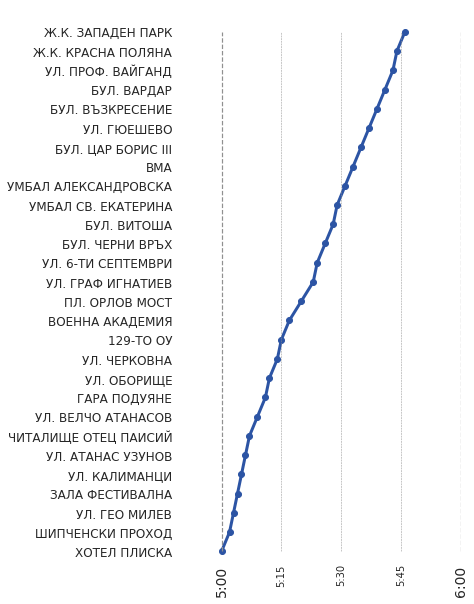

In [352]:
plot_it(num_series=1, xlim=(290, 360), figsize=(5,10))

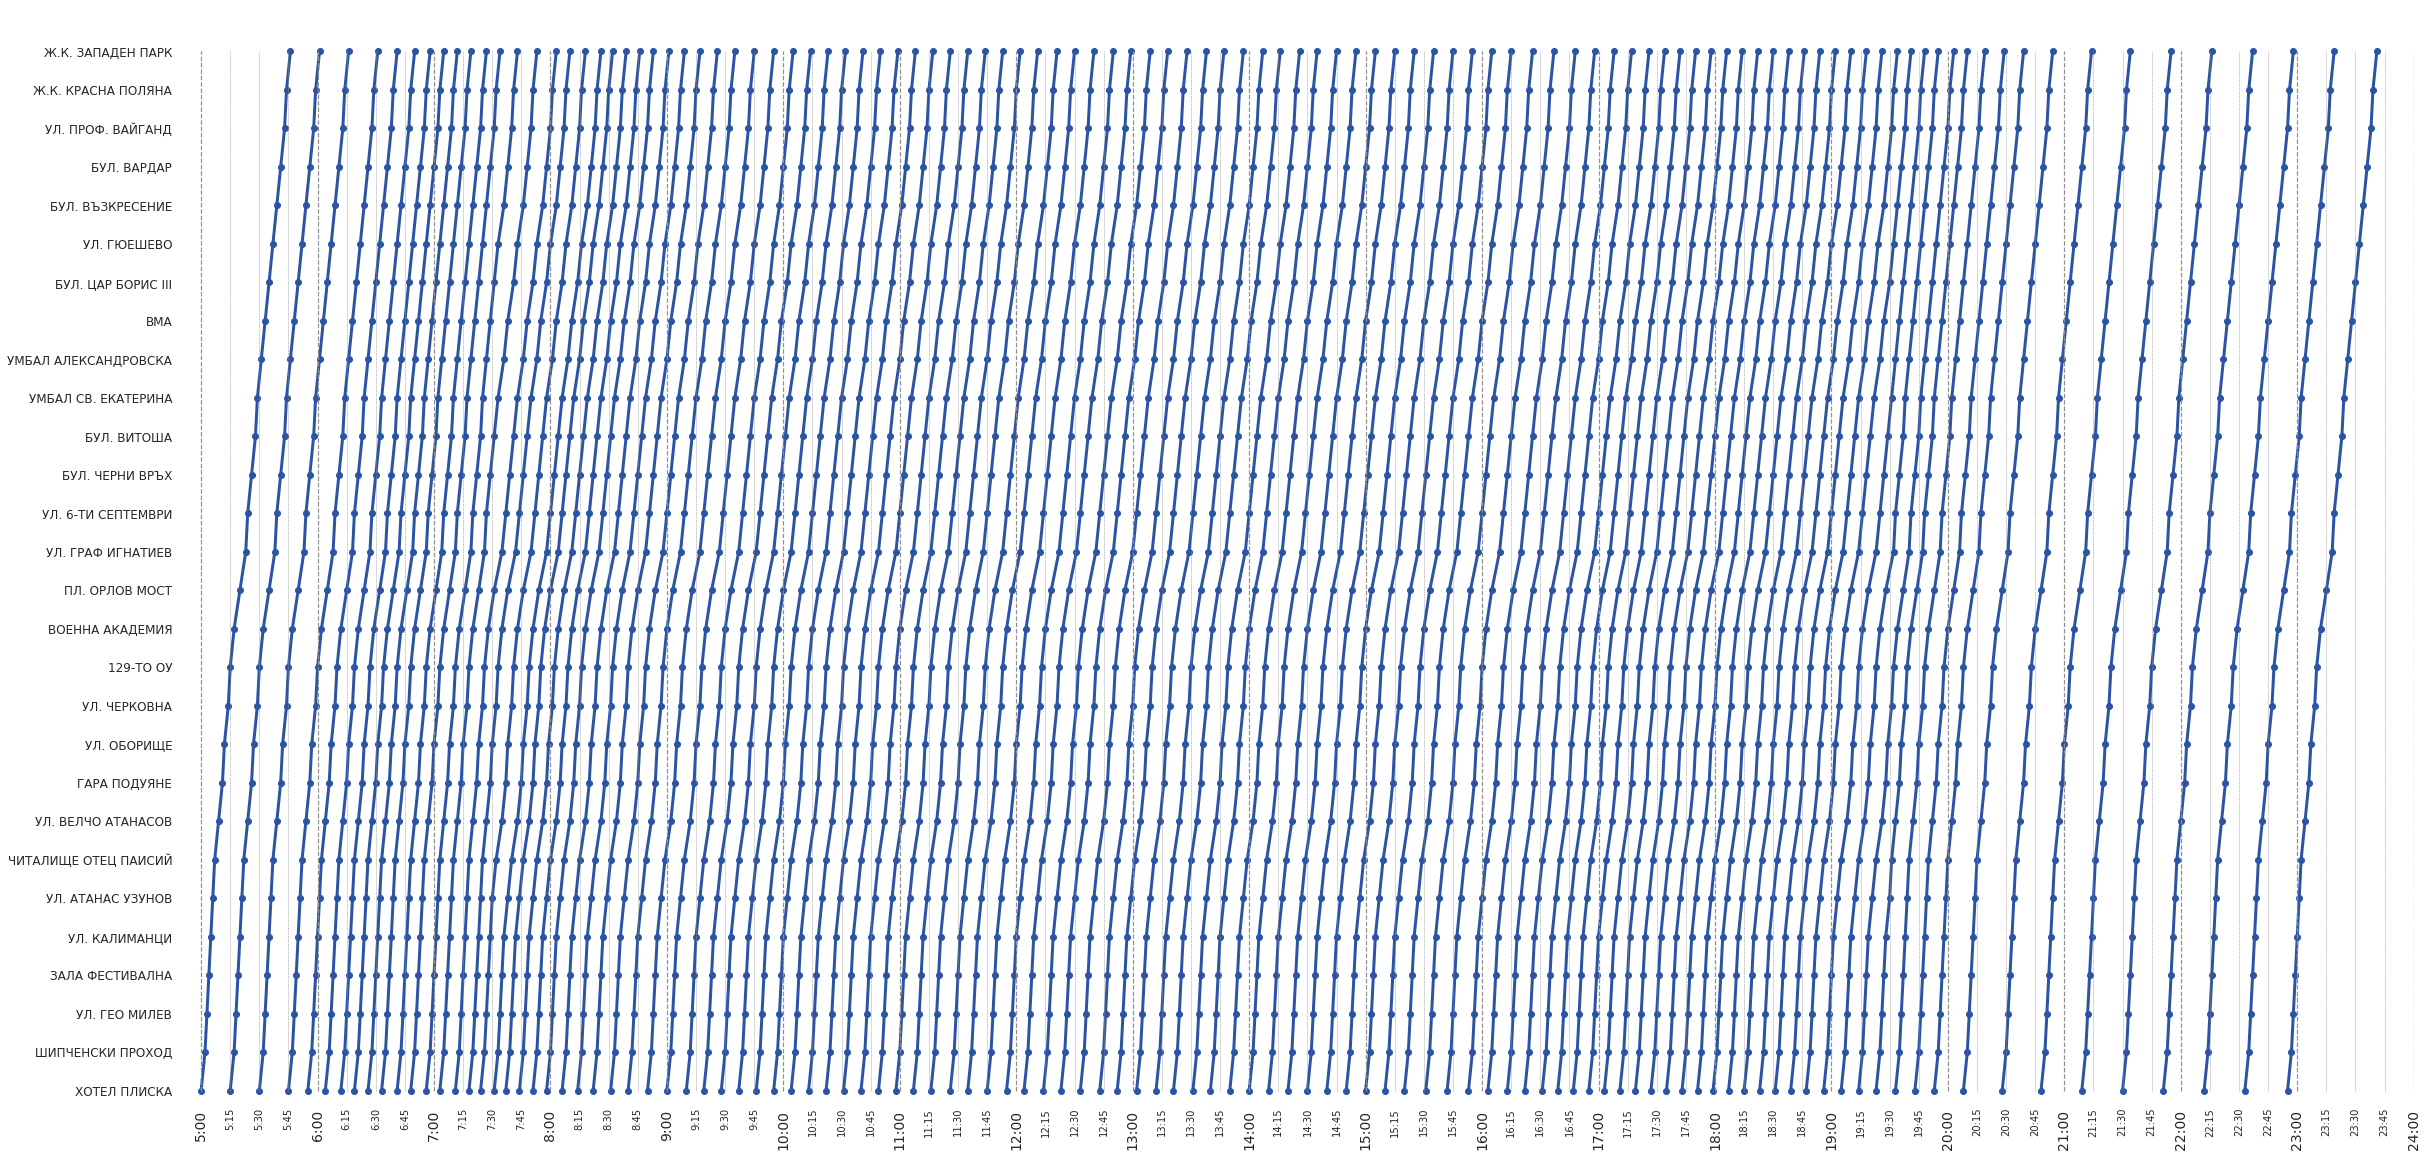

In [355]:
plot_it()